In [1]:
from dis import dis
# from tkinter.tix import AUTO
from requests import head
import torch
import config
import os
from glob import glob
from shutil import copyfile
import pandas as pd
import re
import numpy as np
from math import sqrt
import math
import tensorflow as tf
from keras import regularizers
from tensorflow.keras import Model, Sequential
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from re import X
import numpy as np
import torch
import pandas as pd
from torch.nn.utils.rnn import pack_padded_sequence
from torch.utils.data import DataLoader
from CustomDataset import CustomRawDataset
from model_dispatcher import dispatch_model
from tensorflow import keras
# from model_dispatcher_cnn import dispatch_model
import config
from torch import nn
import os
from glob import glob
from torch.optim import Adam, SGD
from torch.optim.lr_scheduler import ReduceLROnPlateau
from datetime import date, timedelta, datetime
import time
import random
from torch.utils.tensorboard import SummaryWriter
from CustomDataset import custom_collate_fn
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation,TimeDistributed
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential
from tensorflow.compat.v1.keras.layers import CuDNNLSTM
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
raw_angle_files_1 = glob(os.path.join("D:\Research_Project\My_project_22\input\preprocessed", "*", "*.csv"))
# print(raw_angle_files_1)
all_filenames = [i for i in raw_angle_files_1]
df = pd.concat(map(pd.read_csv, all_filenames),ignore_index=True)
data=df
data.to_csv(r"D:\Research_Project\My_project_22\input\final_preprocessed_merged\merged.csv",index=False)
#df=pd.read_csv(r"D:\Research_Project\My_project_22\FEATURES_EXTRACTED\DISTANCES\both_hand_frontup_left_leg_frontup\aatish_both_hand_frontup_left_leg_frontup_trial1_interpolated.csv")
   
# data=df
# print(data.shape)
# target=data['54']
# data=data.drop(['54'],axis=1)
# # data.head()
# print(data.shape)
# AutoEncoder(data)
# data['12']=target
# print(data.shape)

In [2]:
data=pd.read_csv(r"D:\Research_Project\My_project_22\input\final_preprocessed_merged\merged_modified.csv")
data.head()
# target=data['166']
# data=data.drop(['166'],axis=1)
target=data['target']
data=data.drop(['target'],axis=1)
# data=data.drop(['166'],axis=1)
# data.head()
# print(data.shape)
# AutoEncoder(data)
# data['12']=target
# print(data.shape)
print(data.shape)
print(target.shape)


(12260, 166)
(12260,)


<AxesSubplot:>

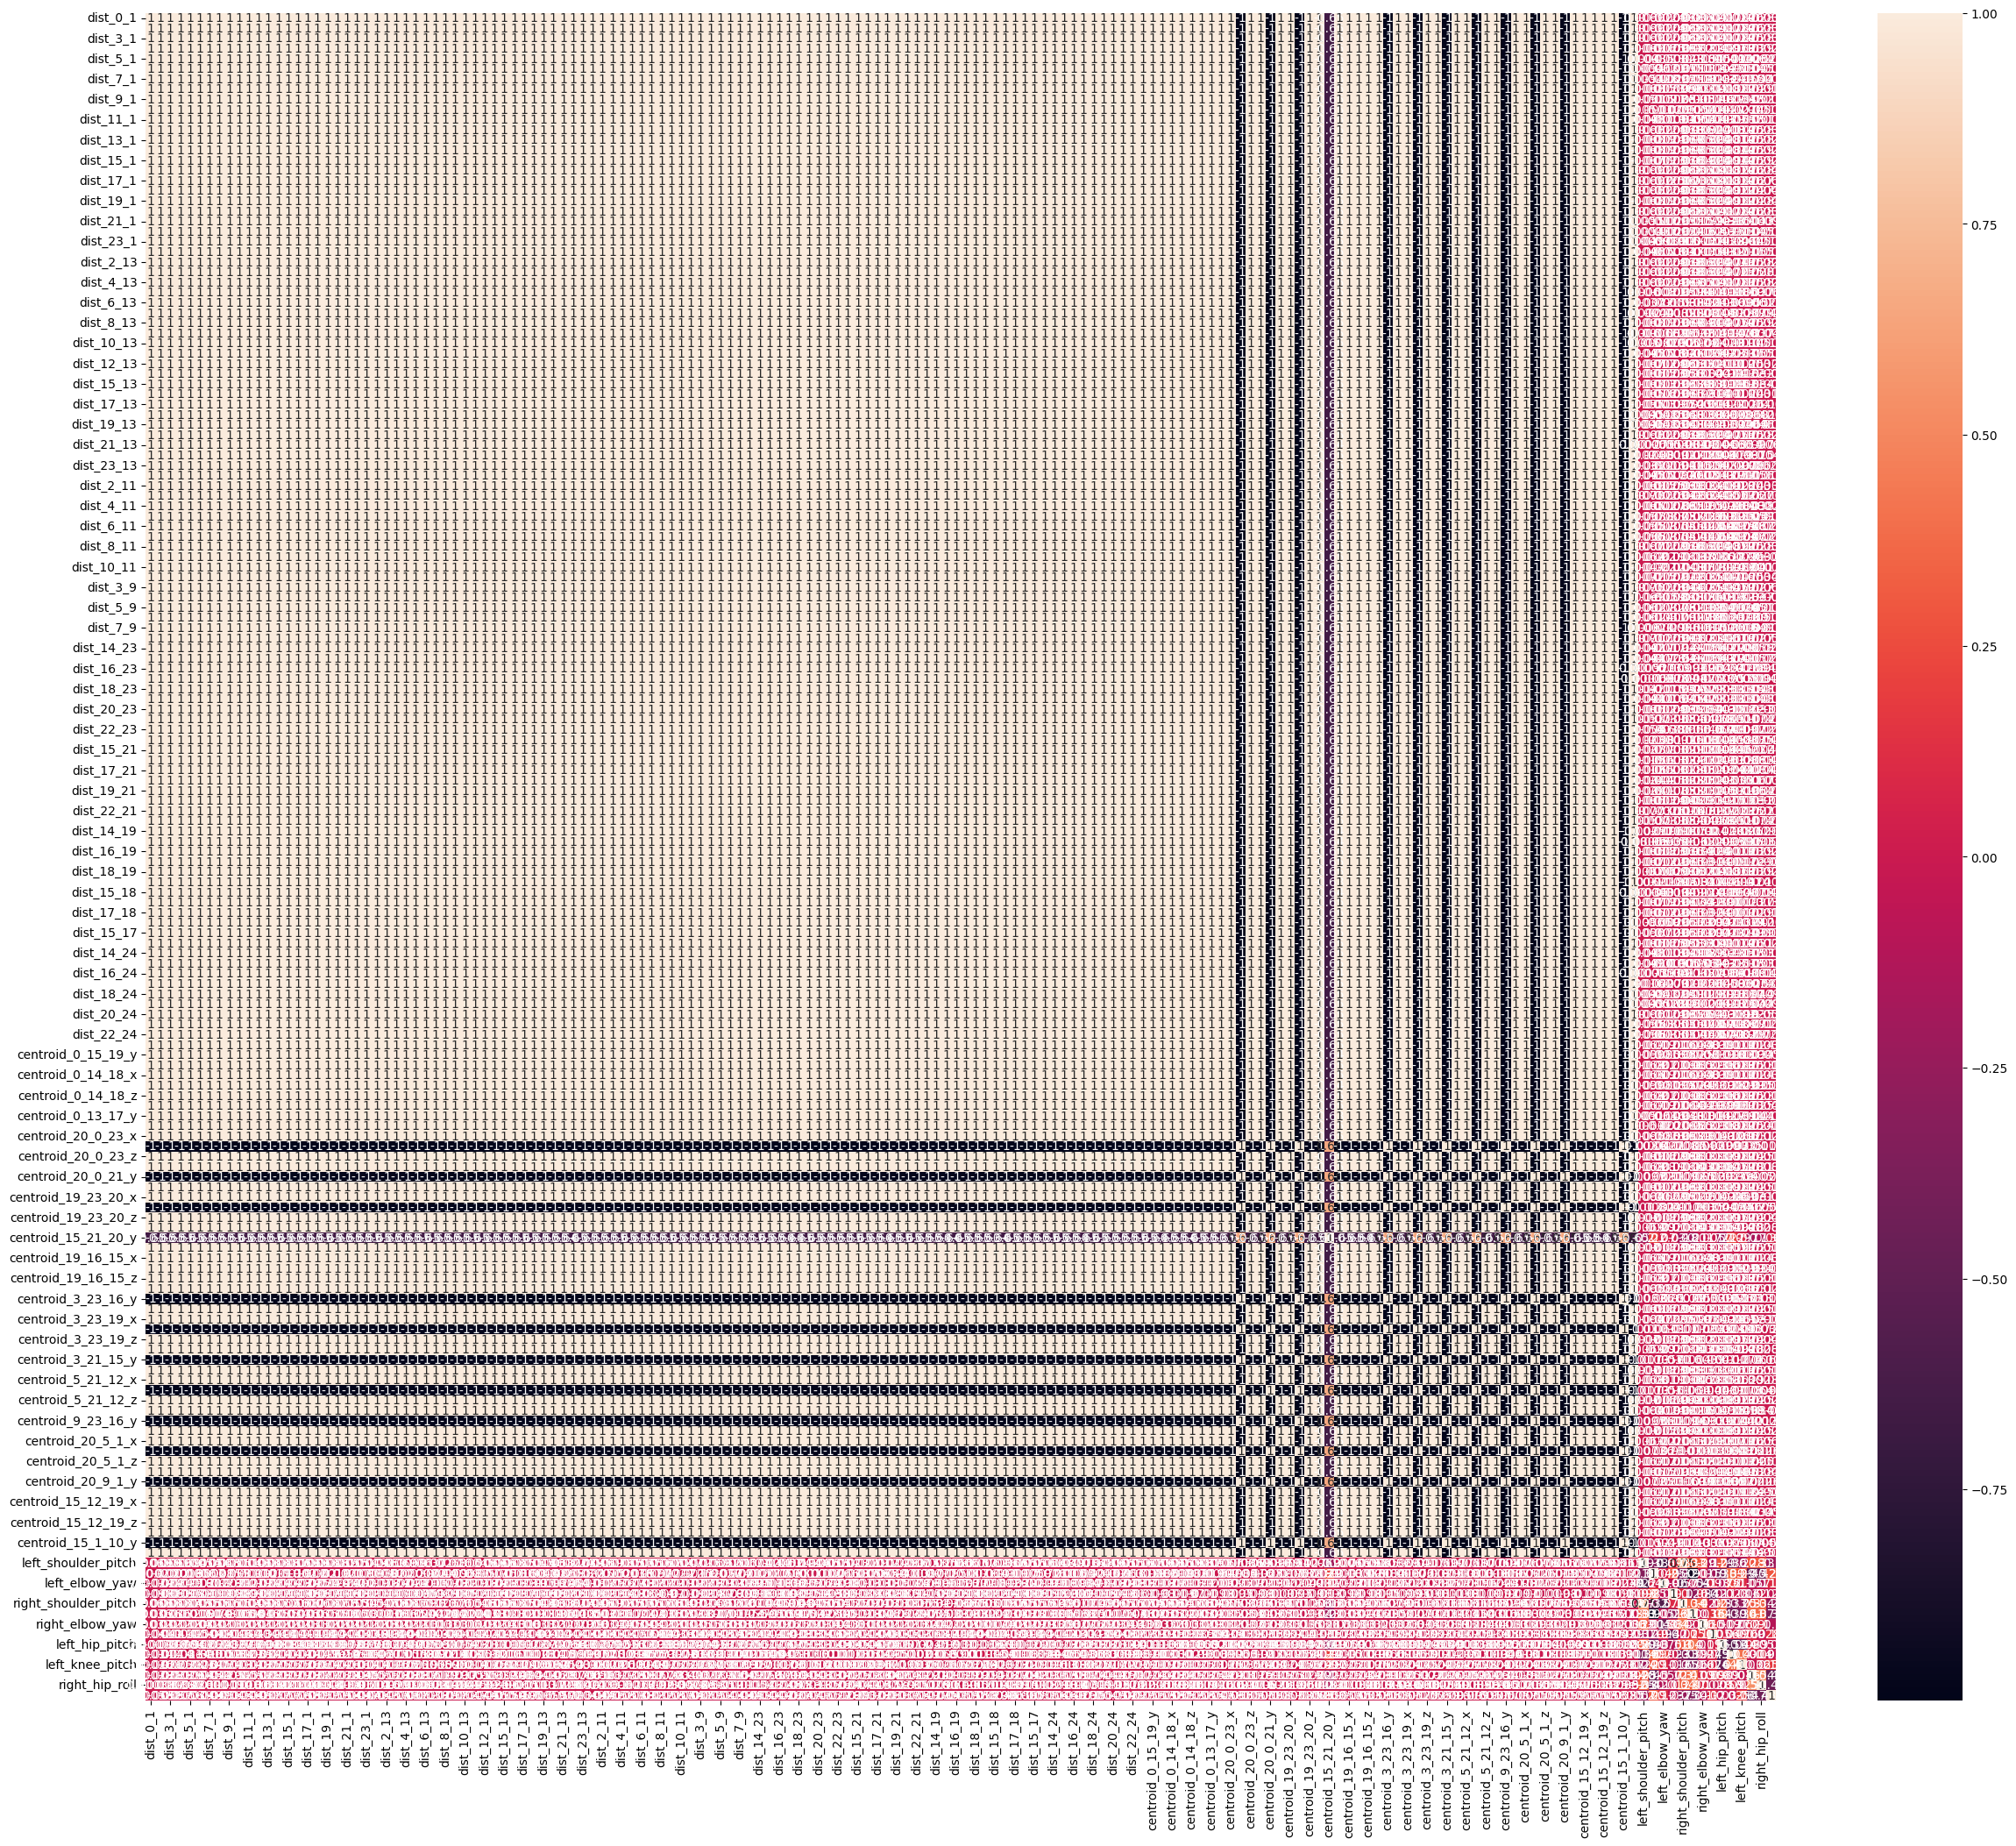

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# data=data.drop(['26'],axis=1)
corr=data.corr()
plt.figure(figsize=(30,25))
sns.heatmap(corr,annot=True)

In [5]:
corr

,dist_0_1,dist_2_1,dist_3_1,dist_4_1,dist_5_1,dist_6_1,dist_7_1,dist_8_1,dist_9_1,dist_10_1,...,right_shoulder_pitch,right_shoulder_roll,right_elbow_yaw,right_elbow_roll,left_hip_pitch,left_hip_roll,left_knee_pitch,right_hip_pitch,right_hip_roll,right_knee_pitch
dist_0_1,1.000000,1.000000,0.999999,0.999997,0.999921,0.999981,0.999982,0.999983,0.999974,0.999977,...,0.006820,0.003612,0.003236,-0.004063,-0.000782,-0.001419,-0.002558,-0.002785,0.000384,-0.005766
dist_2_1,1.000000,1.000000,0.999999,0.999997,0.999921,0.999981,0.999982,0.999982,0.999974,0.999977,...,0.006820,0.003605,0.003241,-0.004063,-0.000783,-0.001417,-0.002556,-0.002790,0.000374,-0.005766
dist_3_1,0.999999,0.999999,1.000000,0.999995,0.999927,0.999979,0.999981,0.999977,0.999975,0.999976,...,0.006827,0.003620,0.003217,-0.004115,-0.000779,-0.001427,-0.002543,-0.002838,0.000383,-0.005747
dist_4_1,0.999997,0.999997,0.999995,1.000000,0.999914,0.999981,0.999984,0.999986,0.999974,0.999978,...,0.006723,0.003198,0.003220,-0.004225,-0.000961,-0.001305,-0.002287,-0.002898,0.000231,-0.005602
dist_5_1,0.999921,0.999921,0.999927,0.999914,1.000000,0.999959,0.999951,0.999881,0.999971,0.999962,...,0.004293,-0.001592,0.003360,-0.004963,-0.004143,0.001354,-0.000263,-0.006420,-0.002638,-0.003864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
left_hip_roll,-0.001419,-0.001417,-0.001427,-0.001305,0.001354,0.000013,-0.000013,-0.001177,0.000340,0.000274,...,-0.327618,-0.393900,-0.026567,0.048642,-0.527387,1.000000,0.404247,0.000401,0.090082,-0.024898
left_knee_pitch,-0.002558,-0.002556,-0.002543,-0.002287,-0.000263,-0.001438,-0.001518,-0.002354,-0.001307,-0.001373,...,-0.245848,-0.361665,-0.061670,0.076104,-0.441404,0.404247,1.000000,-0.035670,0.024799,0.176709
right_hip_pitch,-0.002785,-0.002790,-0.002838,-0.002898,-0.006420,-0.004534,-0.004415,-0.002923,-0.005153,-0.005015,...,0.300747,0.411915,0.089748,0.089908,0.089470,0.000401,-0.035670,1.000000,0.538213,-0.466002
right_hip_roll,0.000384,0.000374,0.000383,0.000231,-0.002638,-0.001103,-0.001034,0.000193,-0.001387,-0.001317,...,0.336671,0.371461,0.101188,-0.028080,0.005294,0.090082,0.024799,0.538213,1.000000,-0.426428


In [6]:

eigen_values , eigen_vectors = np.linalg.eigh(corr)
eigen_values1=[]
for i in eigen_values:
    eigen_values1.append(abs(i))
    
eigen_values1=np.array(eigen_values1)
eigen_values=eigen_values1
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalue = eigen_values[sorted_index]
sorted_index
column_name=[i for i in data.columns]
column_name
no_feat=26
ext_feat_name=[]
for i in range(26):
    print(eigen_values[sorted_index[i]])
    ext_feat_name.append(column_name[int(sorted_index[i])])

ext_feat_name
for i in eigen_values:
    print(i)





151.39727766253569
4.191551205064291
2.118462022331936
1.901938157884303
1.408750192441651
0.8483495426904859
0.6901131047970143
0.6080523172207087
0.5187081007358894
0.4571677728616126
0.43479661988108637
0.41551701921528367
0.36051044700147195
0.331930006462378
0.22269926205605378
0.07680854005699661
0.01113103936929998
0.0017287188454295944
0.0010927383100471535
0.0006973582716681816
0.0004923591546365306
0.0003193377251366203
0.0002963670657966666
0.0002640570883300828
0.00020387550584349942
0.0001524590730375096
1.262794828553338e-14
6.536357273310807e-15
6.10600537812585e-15
2.0337786933753156e-15
2.0393155225721315e-16
3.538657035581718e-17
1.6308729752801652e-15
3.0086045776649125e-15
3.1224965071135094e-15
8.795945830993459e-15
3.9367194620208917e-13
1.1588289760720468e-11
1.72405511859177e-11
3.621531323179442e-11
9.367505532884811e-11
1.7029226904612237e-10
3.297218150660216e-10
4.641660586390245e-10
5.373966800968984e-10
6.709046562261955e-10
8.523332453324395e-10
1.0274924

In [7]:
count=0
x=[]
y=[]
for i in sorted_index:
    x.append(column_name[i])
    y.append(count+1)
    count=count+1
    


([<matplotlib.axis.XTick at 0x21f808954b0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  

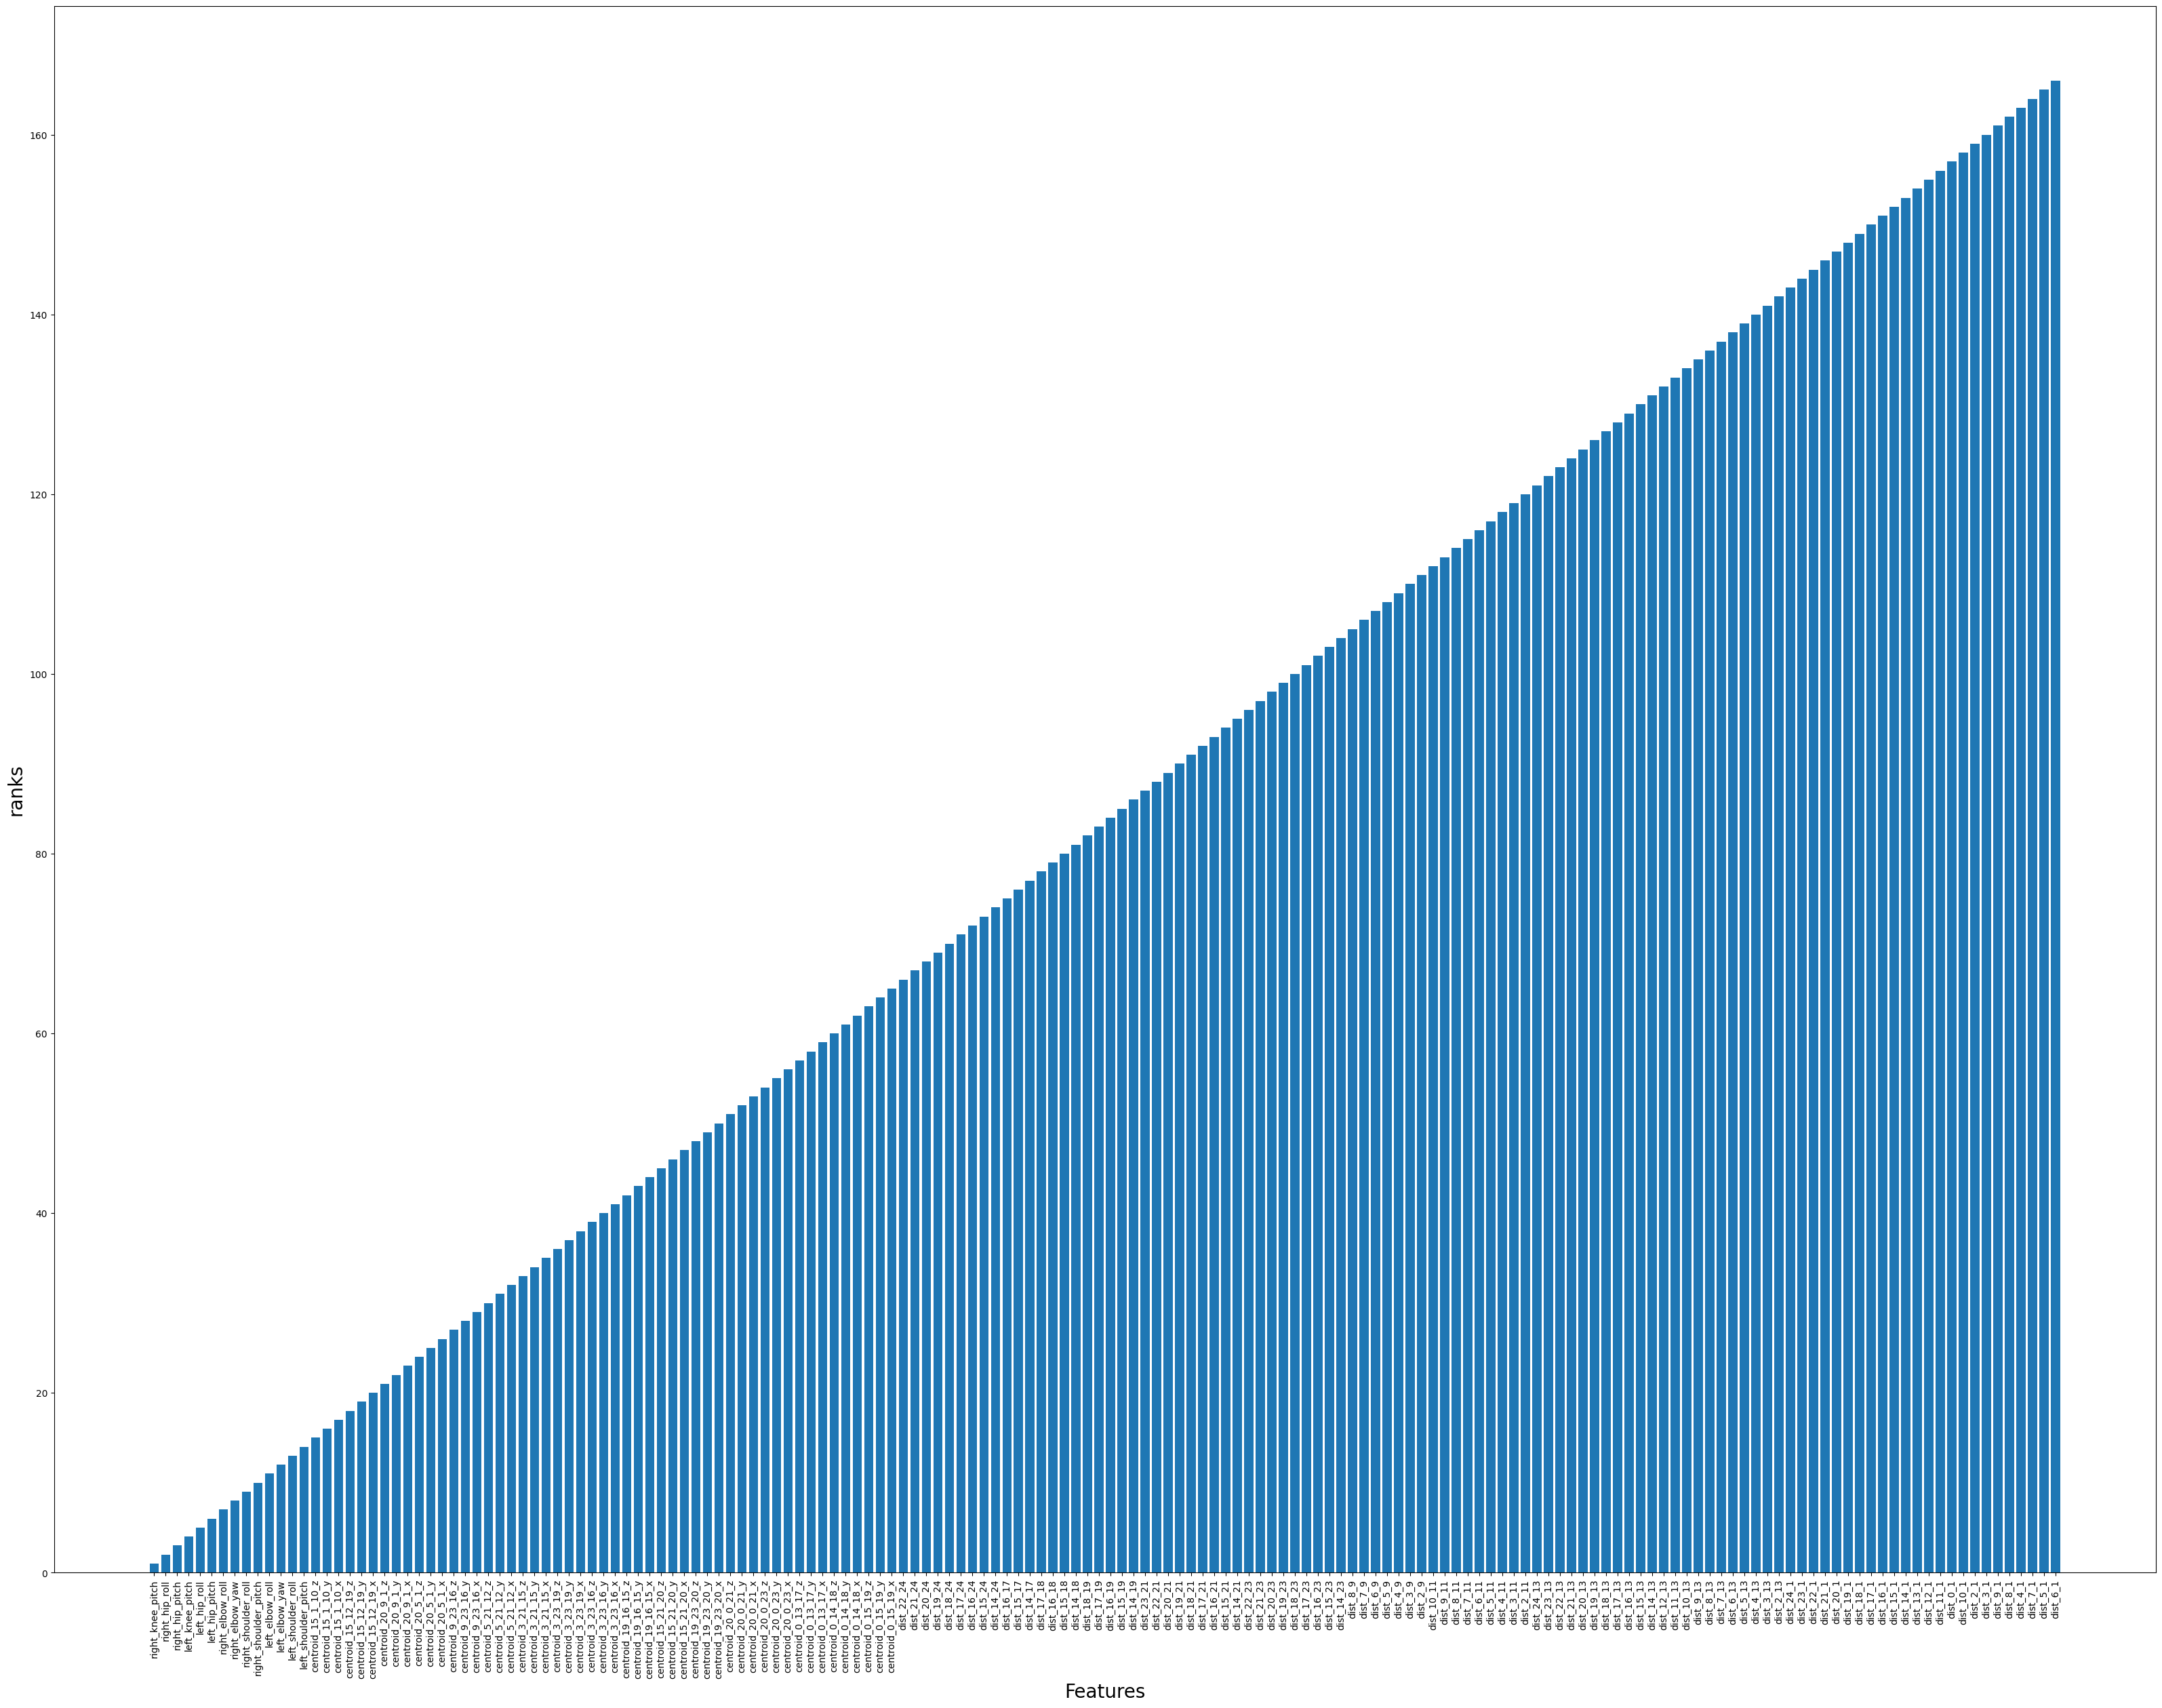

In [8]:
# print(final_df)
plt.figure(figsize=(40,30))
plt.xlabel('Features',size=20)
plt.ylabel('ranks',size=20)
plt.bar(x,y,label="ranks")
plt.xticks(x,rotation='vertical')

In [9]:


x=[]
y=[]
for i in sorted_index:
    x.append(column_name[i])
    y.append(eigen_values[i])
    

([<matplotlib.axis.XTick at 0x21f81452590>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  

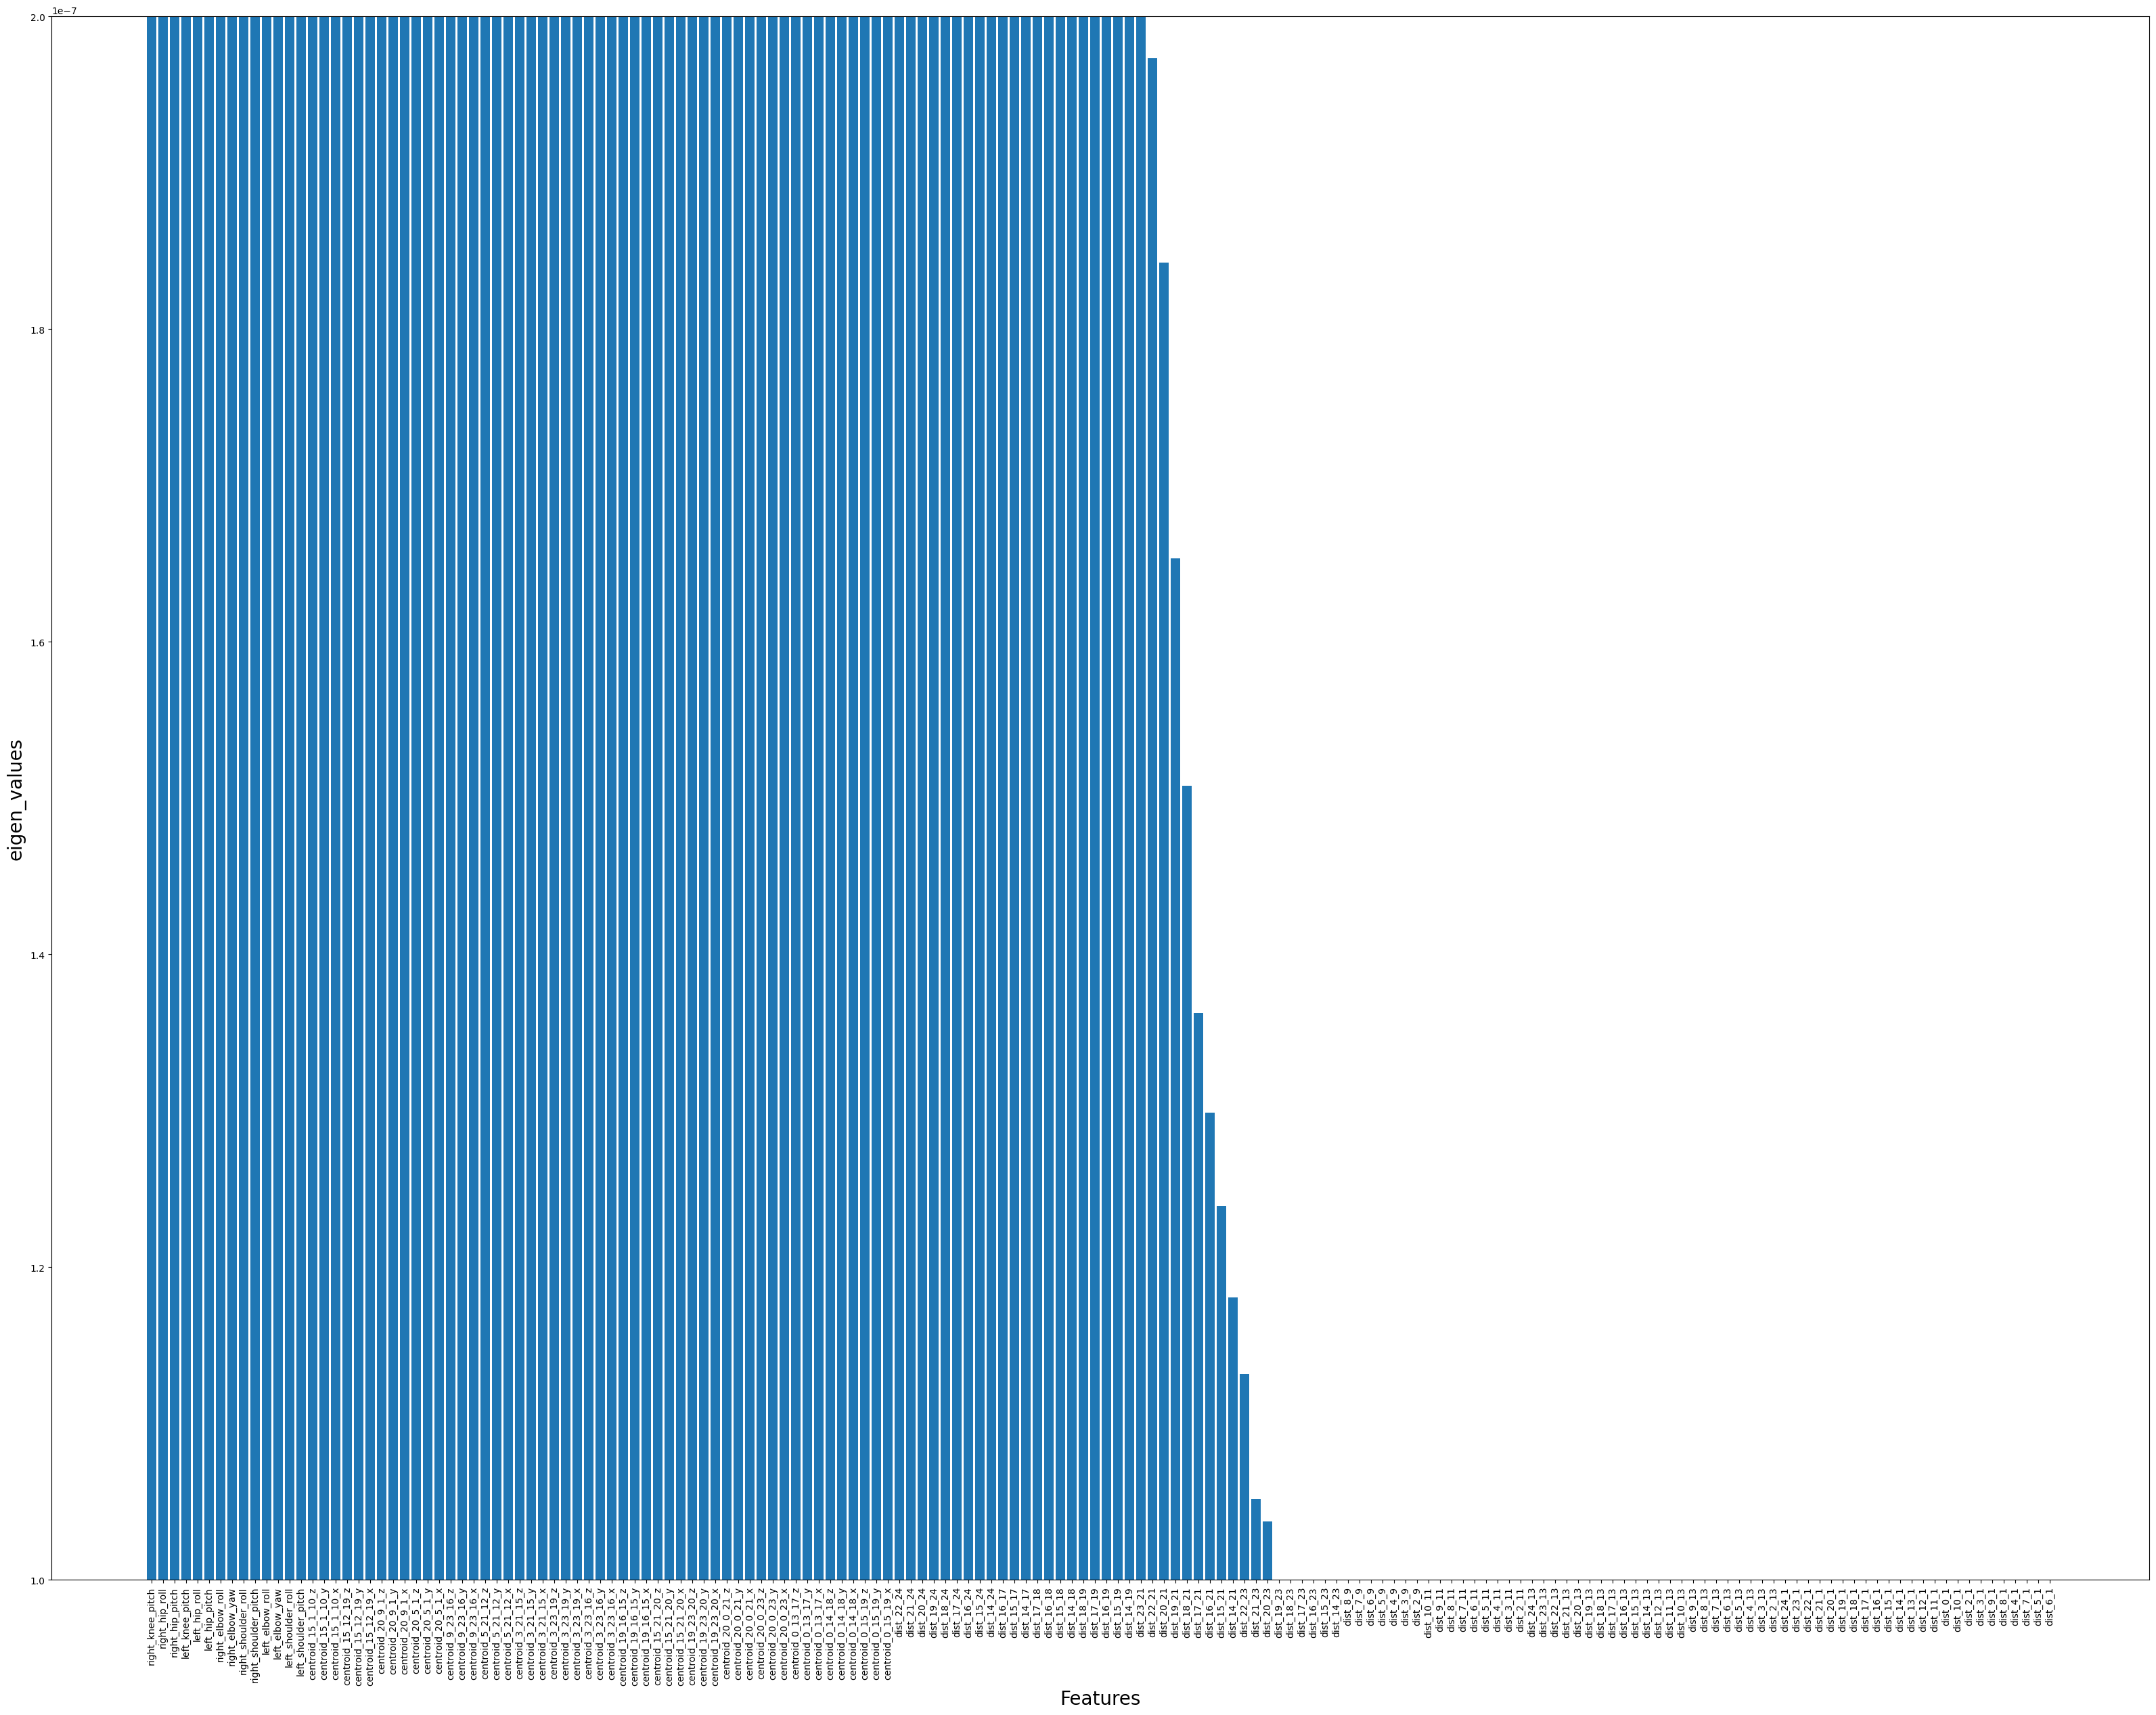

In [10]:
plt.figure(figsize=(40,30))
plt.ylim(0.0000001,0.0000002)
plt.xlabel('Features',size=20)
plt.ylabel('eigen_values',size=20)
plt.bar(x,y,label="eigen_values")
plt.xticks(x,rotation='vertical')

In [12]:
data=data[ext_feat_name]
# data['target']=target
data.head()

,right_knee_pitch,right_hip_roll,right_hip_pitch,left_knee_pitch,left_hip_roll,left_hip_pitch,right_elbow_roll,right_elbow_yaw,right_shoulder_roll,right_shoulder_pitch,...,centroid_15_1_10_x,centroid_15_12_19_z,centroid_15_12_19_y,centroid_15_12_19_x,centroid_20_9_1_z,centroid_20_9_1_y,centroid_20_9_1_x,centroid_20_5_1_z,centroid_20_5_1_y,centroid_20_5_1_x
0,0.131282,0.031990,0.113375,0.081955,-0.027582,0.162107,0.169821,1.246003,-0.140846,1.597459,...,0.423117,2.261033,-0.625023,0.346157,2.216000,0.299417,0.446047,2.222067,0.305887,0.30409
1,0.127583,0.029938,0.088090,0.106628,-0.009114,0.157114,0.211502,1.296214,-0.147442,1.614270,...,0.426360,2.268333,-0.623807,0.350710,2.224300,0.296057,0.449470,2.230433,0.300970,0.30823
2,0.126045,0.029953,0.079567,0.115748,-0.002401,0.156264,0.224825,1.306293,-0.148863,1.619788,...,0.427293,2.270667,-0.623471,0.352113,2.227500,0.295027,0.450647,2.233733,0.299360,0.30970
3,0.125562,0.030147,0.078291,0.116238,-0.001148,0.155941,0.224631,1.302433,-0.148812,1.619716,...,0.427303,2.270800,-0.623497,0.352107,2.228000,0.294923,0.450833,2.234267,0.299230,0.30990
4,0.125631,0.030157,0.077394,0.115037,-0.000888,0.155132,0.226248,1.296863,-0.149545,1.619620,...,0.427320,2.270833,-0.623521,0.352097,2.228167,0.294643,0.451043,2.234367,0.299090,0.30999


In [13]:
def cal_snr(x):
    mean=np.mean(x)
    standard_deviation=np.std(x)
    snr=abs(mean/standard_deviation)
    return snr

In [14]:
column_name=[i for i in data.columns]
column_name

['right_knee_pitch',
 'right_hip_roll',
 'right_hip_pitch',
 'left_knee_pitch',
 'left_hip_roll',
 'left_hip_pitch',
 'right_elbow_roll',
 'right_elbow_yaw',
 'right_shoulder_roll',
 'right_shoulder_pitch',
 'left_elbow_roll',
 'left_elbow_yaw',
 'left_shoulder_roll',
 'left_shoulder_pitch',
 'centroid_15_1_10_z',
 'centroid_15_1_10_y',
 'centroid_15_1_10_x',
 'centroid_15_12_19_z',
 'centroid_15_12_19_y',
 'centroid_15_12_19_x',
 'centroid_20_9_1_z',
 'centroid_20_9_1_y',
 'centroid_20_9_1_x',
 'centroid_20_5_1_z',
 'centroid_20_5_1_y',
 'centroid_20_5_1_x']

In [15]:
list_snr=[]
list_snr_1=[]
for i in range(26):
    snr=cal_snr(data[column_name[i]].values)
    list_snr.append([snr,i])
list_snr_1=list_snr

print(type(list_snr))
list_snr.sort(key=lambda x:x[0])
list_snr.reverse()
index=[]
for i in range(13):
    id=str(list_snr[i][1])
    index.append(column_name[i])
print(index)
data=pd.DataFrame(data[index])

# print(list_snr)



<class 'list'>
['right_knee_pitch', 'right_hip_roll', 'right_hip_pitch', 'left_knee_pitch', 'left_hip_roll', 'left_hip_pitch', 'right_elbow_roll', 'right_elbow_yaw', 'right_shoulder_roll', 'right_shoulder_pitch', 'left_elbow_roll', 'left_elbow_yaw', 'left_shoulder_roll']


In [16]:
x=[]
y=[]
for i in list_snr_1:
    x.append(column_name[i[1]])
    y.append(i[0])

In [17]:
list_snr

[[2.2267076151768617, 10],
 [1.7004539892043007, 6],
 [1.564037086210558, 13],
 [1.5445296310872931, 9],
 [1.1259382075132267, 11],
 [0.9148520276238468, 12],
 [0.8862329117775404, 8],
 [0.7903706885776839, 7],
 [0.6239593082636484, 0],
 [0.6116991642590381, 3],
 [0.23544647480103995, 4],
 [0.21871727470224017, 1],
 [0.10931835163841211, 2],
 [0.06930422127965466, 5],
 [0.06520218117144219, 15],
 [0.043980687540520945, 17],
 [0.043837793365339765, 23],
 [0.043507899685335104, 20],
 [0.04333716320282443, 14],
 [0.020140989560315715, 18],
 [0.0156592556036943, 22],
 [0.015398110985935189, 16],
 [0.013187233450474867, 19],
 [0.011908721346518552, 25],
 [0.0027057704539887096, 21],
 [0.0017990807205510897, 24]]

(array([0. , 0.5, 1. , 1.5, 2. , 2.5]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

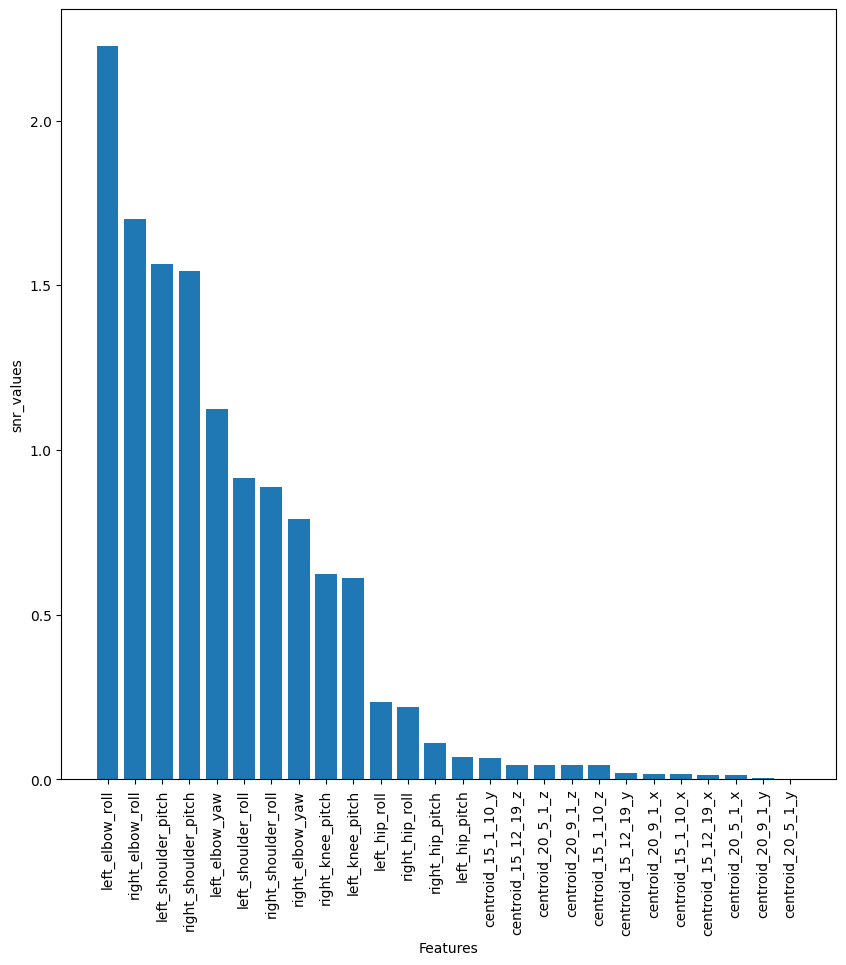

In [18]:
plt.figure(figsize=(10,10))
plt.xlabel('Features',size=10)
plt.ylabel('snr_values',size=10)
plt.bar(x,y,label="snr_values")
plt.xticks(x,rotation='vertical',size=10)
plt.yticks(size=10)

In [19]:
data.head()

,right_knee_pitch,right_hip_roll,right_hip_pitch,left_knee_pitch,left_hip_roll,left_hip_pitch,right_elbow_roll,right_elbow_yaw,right_shoulder_roll,right_shoulder_pitch,left_elbow_roll,left_elbow_yaw,left_shoulder_roll
0,0.131282,0.031990,0.113375,0.081955,-0.027582,0.162107,0.169821,1.246003,-0.140846,1.597459,-0.296553,-1.125618,0.184621
1,0.127583,0.029938,0.088090,0.106628,-0.009114,0.157114,0.211502,1.296214,-0.147442,1.614270,-0.288412,-1.077973,0.161124
2,0.126045,0.029953,0.079567,0.115748,-0.002401,0.156264,0.224825,1.306293,-0.148863,1.619788,-0.288063,-1.061660,0.153572
3,0.125562,0.030147,0.078291,0.116238,-0.001148,0.155941,0.224631,1.302433,-0.148812,1.619716,-0.288264,-1.055622,0.153380
4,0.125631,0.030157,0.077394,0.115037,-0.000888,0.155132,0.226248,1.296863,-0.149545,1.619620,-0.286949,-1.047045,0.153946


In [20]:
# len1=data.shape[1]
# l1=list(range(0,len1))
# l2=[]
# for i in l1:
#     i=str(i)
#     l2.append(i)
# l1=l2
    
# data.columns=l1

# data.head()
data['target']=target
# data=data.sample(frac=1)
data.head()


,right_knee_pitch,right_hip_roll,right_hip_pitch,left_knee_pitch,left_hip_roll,left_hip_pitch,right_elbow_roll,right_elbow_yaw,right_shoulder_roll,right_shoulder_pitch,left_elbow_roll,left_elbow_yaw,left_shoulder_roll,target
0,0.131282,0.031990,0.113375,0.081955,-0.027582,0.162107,0.169821,1.246003,-0.140846,1.597459,-0.296553,-1.125618,0.184621,0
1,0.127583,0.029938,0.088090,0.106628,-0.009114,0.157114,0.211502,1.296214,-0.147442,1.614270,-0.288412,-1.077973,0.161124,0
2,0.126045,0.029953,0.079567,0.115748,-0.002401,0.156264,0.224825,1.306293,-0.148863,1.619788,-0.288063,-1.061660,0.153572,0
3,0.125562,0.030147,0.078291,0.116238,-0.001148,0.155941,0.224631,1.302433,-0.148812,1.619716,-0.288264,-1.055622,0.153380,0
4,0.125631,0.030157,0.077394,0.115037,-0.000888,0.155132,0.226248,1.296863,-0.149545,1.619620,-0.286949,-1.047045,0.153946,0


In [21]:
data.head()
data.to_csv(r"D:\Research_Project\My_project_22\input\final_preprocessed_merged\corr_eigen_snr_modified.csv",index=False)

In [22]:
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :13], sequences[end_ix-1, 13:]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [29]:
data=pd.read_csv(r'D:\Research_Project\My_project_22\input\final_preprocessed_merged\corr_eigen_snr_modified.csv')
data=pd.get_dummies(data,columns=['target'])
data=data.to_numpy()
x,y=split_sequences(data,6)
# x=x[None:]
# print(x.shape)
# print(y.shape)
# data=data.to_numpy()
print(data.shape)

# y=data.iloc[:,26:]
# x=data.iloc[:,:26]
# # x=data[-1:26]
# print(x.shape)
# print(y.shape)
# x=x.to_numpy()
# y=y.to_numpy()
x_train,x_test,y_train,y_test= train_test_split(x, y, test_size = 0.2)
print(x_train.shape)
print(y_train.shape)
print(type(y_train))



model = Sequential()
model.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(6,13)))
model.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Flatten())
model.add(Dense(100, activation='relu'))
model.add(layers.BatchNormalization())
model.add(Dense(10, activation='softmax'))

model.summary()


# model.summary()
# # log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# # tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# # print(x.shape)
history = model.fit(x_train, y_train,batch_size=config.BATCH_SIZE,epochs=100,validation_data=(x_test,y_test),verbose=1)
results = model.evaluate(x_test, y_test)
# y_pred=model.predict(x_test)
# y_pred=np.argmax(y_pred,axis=1)
# y_test=np.argmax(y_test,axis=1)
# print(y_pred)


(12260, 23)
(9804, 6, 13)
(9804, 10)
<class 'numpy.ndarray'>
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 4, 64)             2560      
                                                                 
 conv1d_3 (Conv1D)           (None, 2, 64)             12352     
                                                                 
 dropout_1 (Dropout)         (None, 2, 64)             0         
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 1, 64)            0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 100)               6500

Confusion matrix
 [[248   1   1   0   0   0   0   0   0   0]
 [ 21 225   2   0   0   0   0   0   2   0]
 [  4   0 271   0   0   0   2   0   1   0]
 [  0   2   8 233   0   0   0   0   0   0]
 [  0   0   0   1 261   4   0   0   1   0]
 [  1   0   0   0   8 206   3   0   1   1]
 [  0   0   0   0   0  12 248   0   1   4]
 [  0   0   0   0   0   3   9 221   0   0]
 [  1   0   0   0   9   1   3   1 234   0]
 [  0   0   0   0   5   0   5   0   3 183]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       250
           1       0.99      0.90      0.94       250
           2       0.96      0.97      0.97       278
           3       1.00      0.96      0.98       243
           4       0.92      0.98      0.95       267
           5       0.91      0.94      0.92       220
           6       0.92      0.94      0.93       265
           7       1.00      0.95      0.97       233
           8       0.96      0.94      0.95       249
          

In [30]:
model.save(r'D:\Research_Project\My_project_22\models\my_model_10')

INFO:tensorflow:Assets written to: D:\Research_Project\My_project_22\models\my_model_10\assets


INFO:tensorflow:Assets written to: D:\Research_Project\My_project_22\models\my_model_10\assets


In [31]:
new_model = tf.keras.models.load_model(r'D:\Research_Project\My_project_22\models\my_model_10')
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 4, 64)             2560      
                                                                 
 conv1d_3 (Conv1D)           (None, 2, 64)             12352     
                                                                 
 dropout_1 (Dropout)         (None, 2, 64)             0         
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 1, 64)            0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 100)               6500      
                                                      

In [32]:
y_pred=new_model.predict(x_test)
y_pred1=np.argmax(y_pred,axis=1)
y_test1=np.argmax(y_test,axis=1)
# print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

77/77 [==============================] - 0s 4ms/step


In [33]:
cf_matrix=metrics.confusion_matrix(y_test1,y_pred1)
print('Confusion matrix\n',cf_matrix)
print(metrics.classification_report(y_test1,y_pred1))

Confusion matrix
 [[270   2   2   0   0   0   0   0   0   0]
 [ 15 225   2   1   0   0   0   0   0   0]
 [  1   0 264   0   0   0   0   0   0   0]
 [  0   0   1 259   1   0   0   0   0   0]
 [  1   0   0   0 249   1   4   0   4   0]
 [  1   0   2   0   1 180   0   2   6   2]
 [  0   0   0   0   0   3 259   2   0   2]
 [  0   0   0   0   0   0   8 237   2   1]
 [  2   0   3   0   0   0  12   1 243   0]
 [  0   0   0   0   0   0  14   0   8 158]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       274
           1       0.99      0.93      0.96       243
           2       0.96      1.00      0.98       265
           3       1.00      0.99      0.99       261
           4       0.99      0.96      0.98       259
           5       0.98      0.93      0.95       194
           6       0.87      0.97      0.92       266
           7       0.98      0.96      0.97       248
           8       0.92      0.93      0.93       261
          

In [19]:
print('specificity:')
tot=0
for i in range (10):
    sum=0
    for j in range(10):
        sum=sum+cf_matrix[i,j]
    spec=cf_matrix[i,i]/sum
    tot+=spec
    print(i," ",spec)
print('specificity avg\n',tot/10)

specificity:
0   0.9923954372623575
1   0.8588709677419355
2   0.9802371541501976
3   0.9683794466403162
4   0.91015625
5   0.9571428571428572
6   0.9783393501805054
7   0.9705882352941176
8   0.8745098039215686
9   0.7626262626262627
specificity avg
 0.9253245764960119


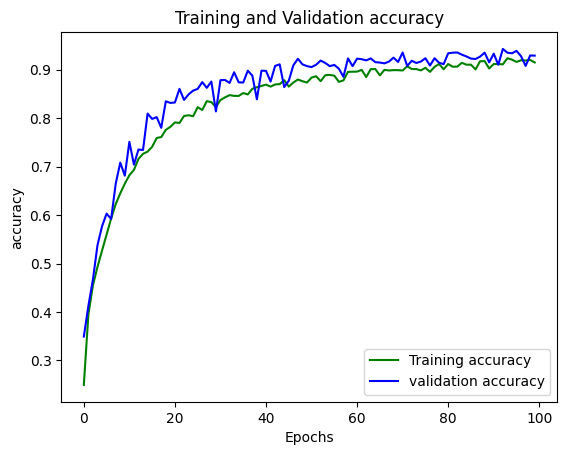

In [20]:
acc_train = history.history["accuracy"]
acc_val = history.history["val_accuracy"]
epochs = range(1,99)
plt.plot(acc_train, 'g', label='Training accuracy')
plt.plot(acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

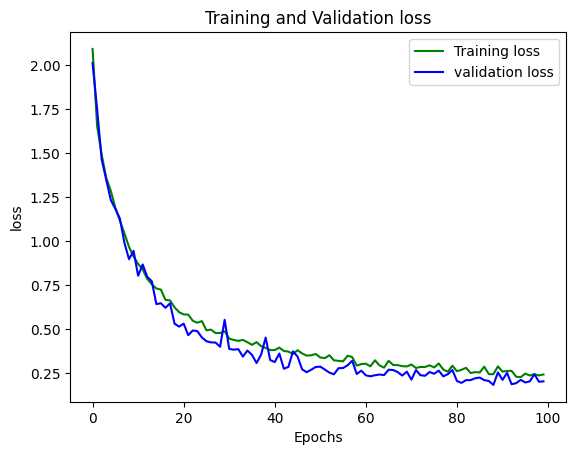

In [21]:
loss_train = history.history["loss"]
loss_val = history.history["val_loss"]
epochs = range(1,99)
plt.plot(loss_train, 'g', label='Training loss')
plt.plot(loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
#pool, kernel size,learning rate

In [58]:
data=pd.read_csv(r"D:\Research_Project\My_project_22\input\final_preprocessed_merged\merged_modified.csv")
data.head()
target=data['target']

print(data.shape)
print(target.shape)


(12260, 167)
(12260,)


<AxesSubplot:>

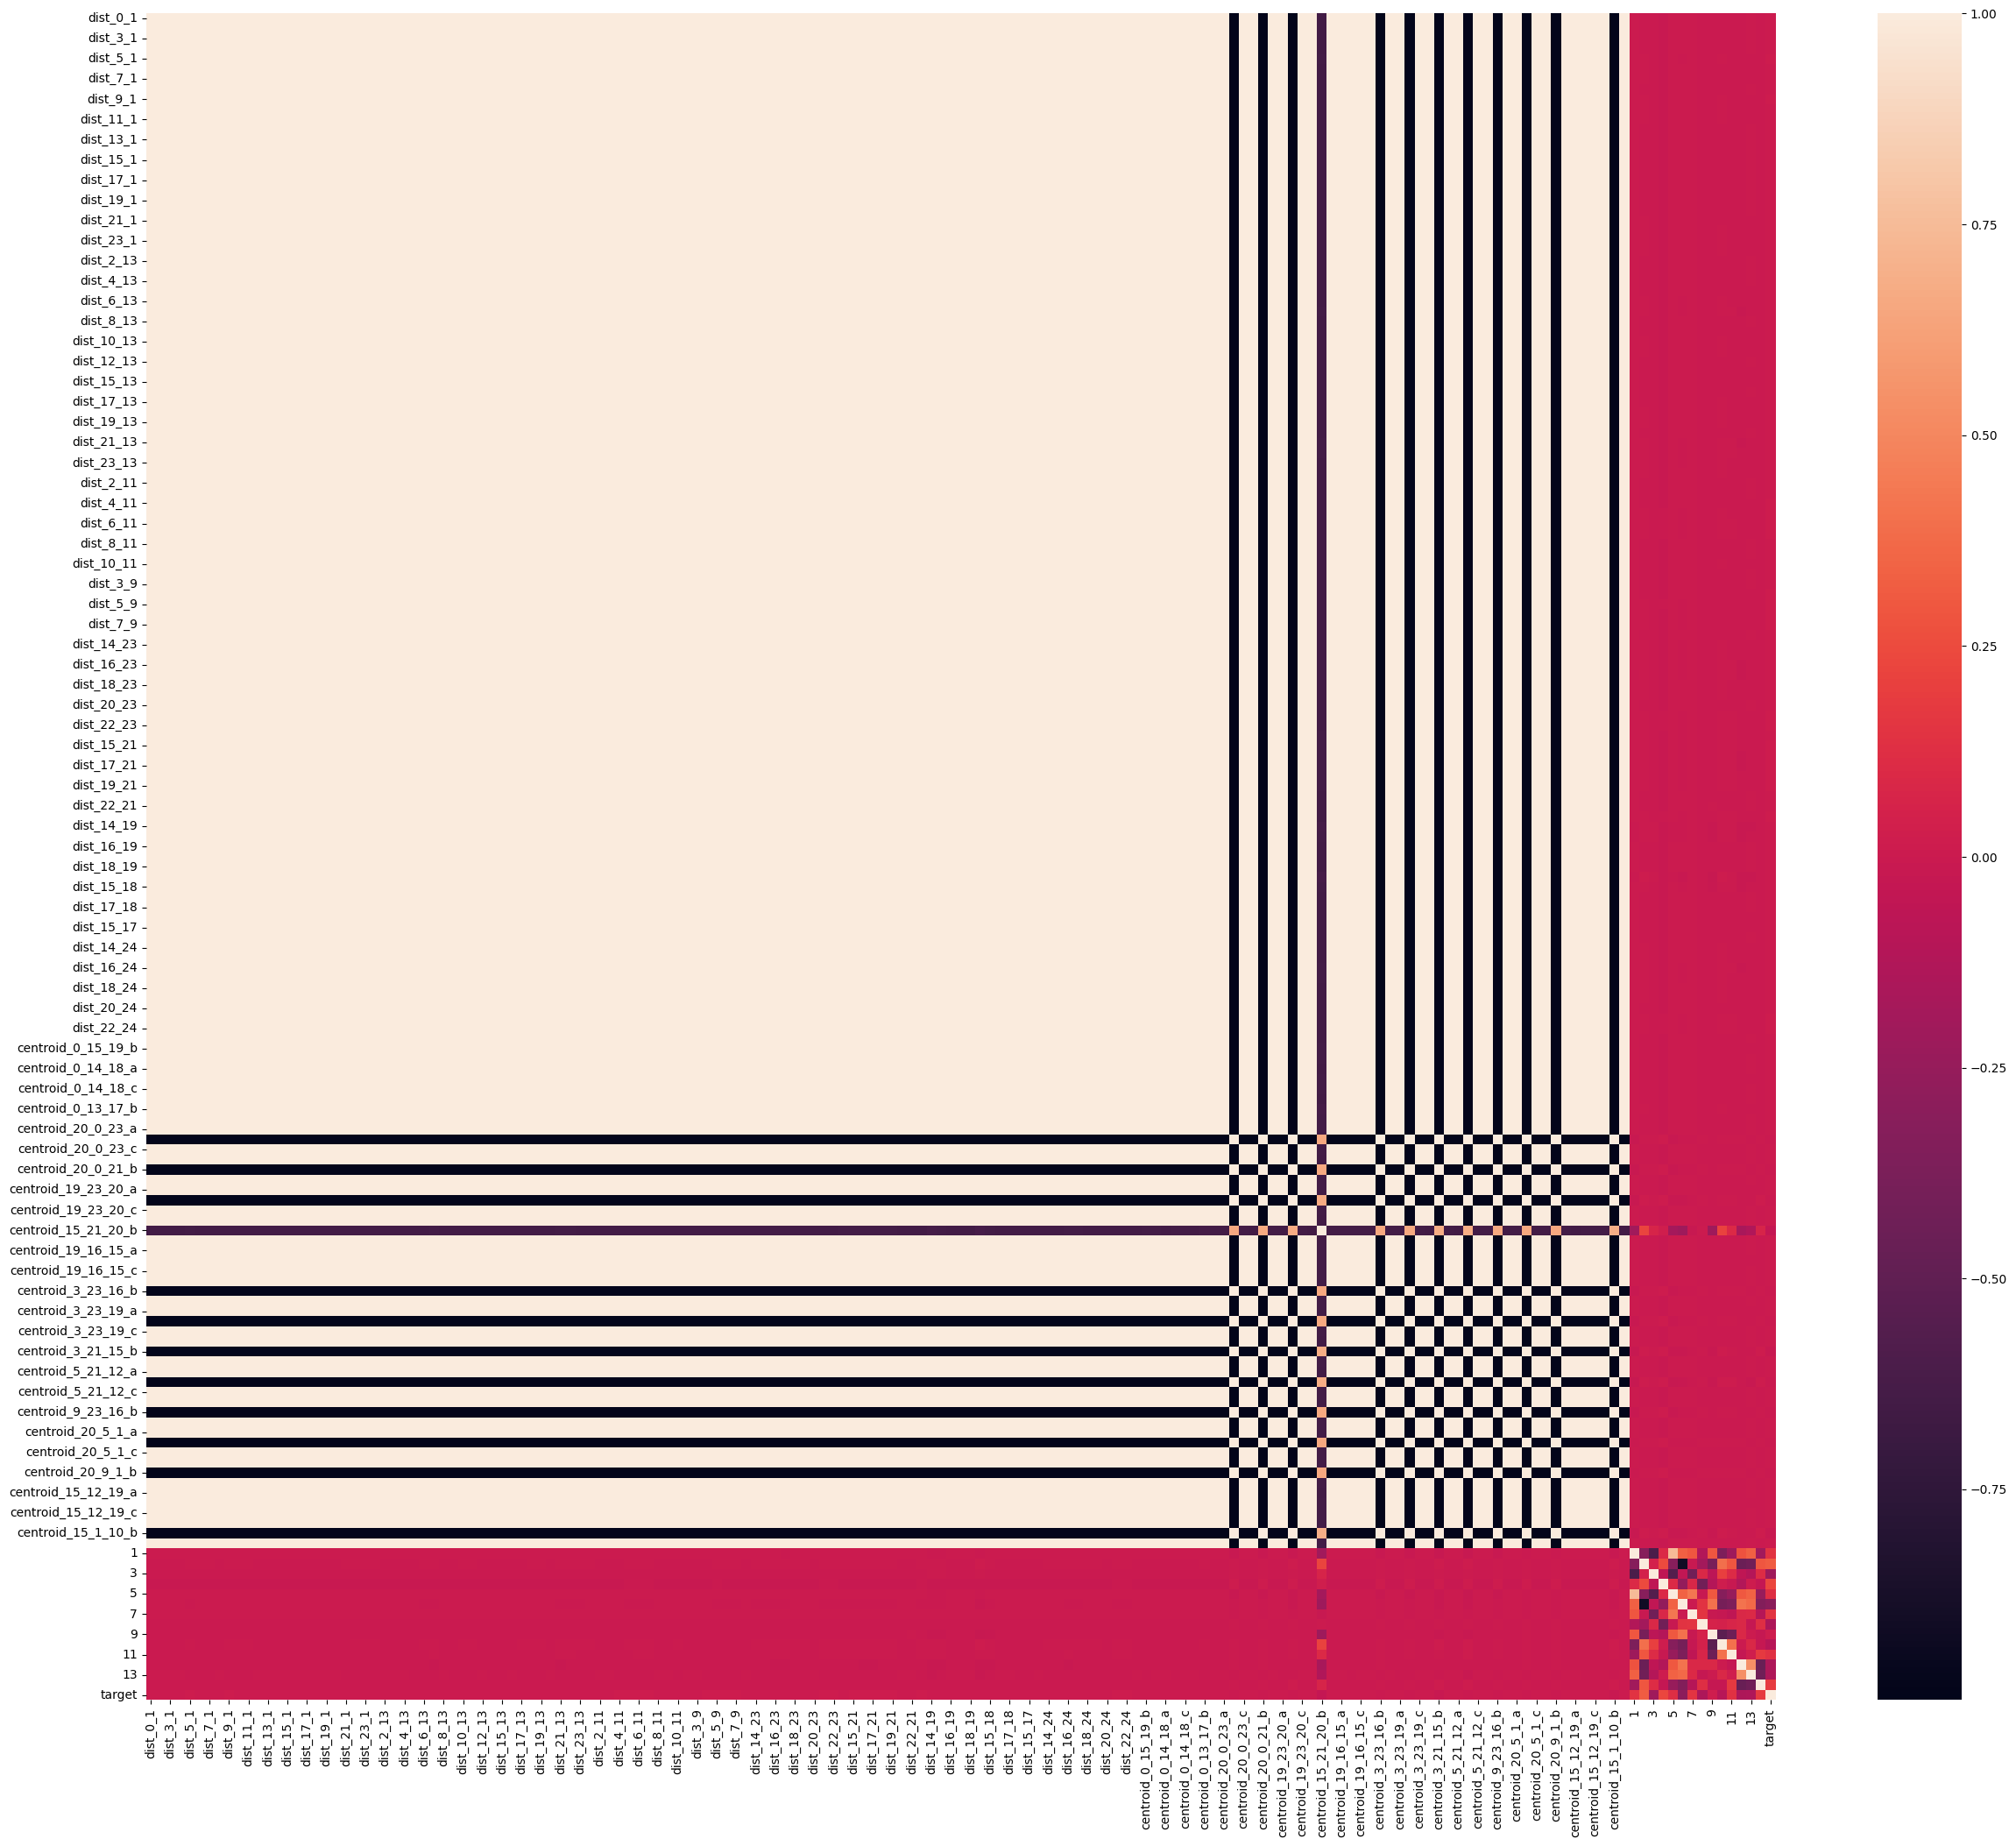

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# data=data.drop(['26'],axis=1)
corr=data.corr()
plt.figure(figsize=(30,25))
sns.heatmap(corr)

In [41]:

eigen_values , eigen_vectors = np.linalg.eigh(corr)
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalue = eigen_values[sorted_index]
sorted_index
column_name=[i for i in data.columns]
column_name
no_feat=80
ext_feat_name=[]
for i in range(81):
    ext_feat_name.append(column_name[int(sorted_index[i])])
ext_feat_name=ext_feat_name[1:]
ext_feat_name
data=data[ext_feat_name]
# data['target']=target
data.head()




,14,13,12,11,10,9,8,7,6,5,...,dist_17_24,dist_16_24,dist_15_24,dist_14_24,dist_16_17,dist_15_17,dist_14_17,dist_17_18,dist_16_18,dist_15_18
0,0.131282,0.031990,0.113375,0.081955,-0.027582,0.162107,0.169821,1.246003,-0.140846,1.597459,...,0.314898,0.225009,0.753598,0.709610,0.399364,0.467478,0.407976,0.388444,0.786112,0.159106
1,0.127583,0.029938,0.088090,0.106628,-0.009114,0.157114,0.211502,1.296214,-0.147442,1.614270,...,0.386546,0.185586,0.844077,0.790401,0.401308,0.462827,0.404478,0.374783,0.774515,0.156329
2,0.126045,0.029953,0.079567,0.115748,-0.002401,0.156264,0.224825,1.306293,-0.148863,1.619788,...,0.403534,0.185717,0.862341,0.807009,0.402060,0.461592,0.403557,0.370093,0.770622,0.156213
3,0.125562,0.030147,0.078291,0.116238,-0.001148,0.155941,0.224631,1.302433,-0.148812,1.619716,...,0.400393,0.184657,0.859374,0.804082,0.402072,0.461681,0.403761,0.369741,0.770295,0.156523
4,0.125631,0.030157,0.077394,0.115037,-0.000888,0.155132,0.226248,1.296863,-0.149545,1.619620,...,0.401257,0.185328,0.859690,0.805094,0.401992,0.461768,0.403999,0.369785,0.770257,0.156613


In [42]:
def cal_snr(x):
    mean=np.mean(x)
    standard_deviation=np.std(x)
    snr=abs(mean/standard_deviation)
    return snr

In [43]:
column_name=[i for i in data.columns]
column_name


['14',
 '13',
 '12',
 '11',
 '10',
 '9',
 '8',
 '7',
 '6',
 '5',
 '4',
 '3',
 '2',
 '1',
 'centroid_15_1_10_c',
 'centroid_15_1_10_b',
 'centroid_15_1_10_a',
 'centroid_15_12_19_c',
 'centroid_15_12_19_b',
 'centroid_15_12_19_a',
 'centroid_20_9_1_c',
 'centroid_20_9_1_b',
 'centroid_20_9_1_a',
 'centroid_20_5_1_c',
 'centroid_20_5_1_b',
 'centroid_20_5_1_a',
 'centroid_9_23_16_c',
 'centroid_9_23_16_b',
 'centroid_9_23_16_a',
 'centroid_5_21_12_c',
 'centroid_5_21_12_b',
 'centroid_5_21_12_a',
 'centroid_3_21_15_c',
 'centroid_3_21_15_b',
 'centroid_3_21_15_a',
 'centroid_3_23_19_c',
 'centroid_3_23_19_b',
 'centroid_3_23_19_a',
 'centroid_3_23_16_c',
 'centroid_3_23_16_b',
 'centroid_3_23_16_a',
 'centroid_19_16_15_c',
 'centroid_19_16_15_b',
 'centroid_19_16_15_a',
 'centroid_15_21_20_c',
 'centroid_15_21_20_b',
 'centroid_15_21_20_a',
 'centroid_19_23_20_c',
 'centroid_19_23_20_b',
 'centroid_19_23_20_a',
 'centroid_20_0_21_c',
 'centroid_20_0_21_b',
 'centroid_20_0_21_a',
 'centro

In [44]:
list_snr=[]
for i in range(80):
    snr=cal_snr(data[column_name[i]].values)
    list_snr.append([snr,i])

print(type(list_snr))
list_snr.sort(key=lambda x:x[0])
list_snr.reverse()
index=[]
for i in range(60):
    id=str(list_snr[i][1])
    index.append(column_name[i])
print(index)
data=pd.DataFrame(data[index])
data['target']=target
# data=data.sample(frac=1)
data.head()

# print(list_snr)



<class 'list'>
['14', '13', '12', '11', '10', '9', '8', '7', '6', '5', '4', '3', '2', '1', 'centroid_15_1_10_c', 'centroid_15_1_10_b', 'centroid_15_1_10_a', 'centroid_15_12_19_c', 'centroid_15_12_19_b', 'centroid_15_12_19_a', 'centroid_20_9_1_c', 'centroid_20_9_1_b', 'centroid_20_9_1_a', 'centroid_20_5_1_c', 'centroid_20_5_1_b', 'centroid_20_5_1_a', 'centroid_9_23_16_c', 'centroid_9_23_16_b', 'centroid_9_23_16_a', 'centroid_5_21_12_c', 'centroid_5_21_12_b', 'centroid_5_21_12_a', 'centroid_3_21_15_c', 'centroid_3_21_15_b', 'centroid_3_21_15_a', 'centroid_3_23_19_c', 'centroid_3_23_19_b', 'centroid_3_23_19_a', 'centroid_3_23_16_c', 'centroid_3_23_16_b', 'centroid_3_23_16_a', 'centroid_19_16_15_c', 'centroid_19_16_15_b', 'centroid_19_16_15_a', 'centroid_15_21_20_c', 'centroid_15_21_20_b', 'centroid_15_21_20_a', 'centroid_19_23_20_c', 'centroid_19_23_20_b', 'centroid_19_23_20_a', 'centroid_20_0_21_c', 'centroid_20_0_21_b', 'centroid_20_0_21_a', 'centroid_20_0_23_c', 'centroid_20_0_23_b', '

,14,13,12,11,10,9,8,7,6,5,...,centroid_20_0_21_b,centroid_20_0_21_a,centroid_20_0_23_c,centroid_20_0_23_b,centroid_20_0_23_a,centroid_0_13_17_c,centroid_0_13_17_b,centroid_0_13_17_a,centroid_0_14_18_c,target
0,0.131282,0.031990,0.113375,0.081955,-0.027582,0.162107,0.169821,1.246003,-0.140846,1.597459,...,0.059464,0.312240,2.194800,0.053541,0.446287,2.270467,-0.337553,0.380257,2.316167,0
1,0.127583,0.029938,0.088090,0.106628,-0.009114,0.157114,0.211502,1.296214,-0.147442,1.614270,...,0.060723,0.314830,2.210400,0.056823,0.449207,2.277767,-0.341323,0.383360,2.317200,0
2,0.126045,0.029953,0.079567,0.115748,-0.002401,0.156264,0.224825,1.306293,-0.148863,1.619788,...,0.060574,0.316340,2.217000,0.057184,0.451327,2.280433,-0.342636,0.384443,2.317700,0
3,0.125562,0.030147,0.078291,0.116238,-0.001148,0.155941,0.224631,1.302433,-0.148812,1.619716,...,0.060267,0.316653,2.217733,0.056931,0.452303,2.280833,-0.342736,0.384600,2.317867,0
4,0.125631,0.030157,0.077394,0.115037,-0.000888,0.155132,0.226248,1.296863,-0.149545,1.619620,...,0.060252,0.315927,2.216367,0.057139,0.451847,2.280933,-0.342638,0.384773,2.317967,0


In [45]:
data.head()
data.to_csv(r"D:\Research_Project\My_project_22\input\final_preprocessed_merged\corr_eigen_snr_large.csv",index=False)

In [47]:
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :60], sequences[end_ix-1, 60:]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [50]:
# raw_angle_files_1 = glob(os.path.join("D:\Research_Project\My_project_22\input\preprocessed_modified", "*", "*.csv"))
# # print(raw_angle_files_1)
# all_filenames = [i for i in raw_angle_files_1]
# df = pd.concat(map(pd.read_csv, all_filenames),ignore_index=True)
# data=pd.read_csv(r"D:\Research_Project\My_project_22\input\final_preprocessed_merged\tree_classifier_extracted.csv")
# print(df.shape)
# df = df.sample(frac = 1)
# # df.iloc[1:10,:]


list_train_accuracy=[]
list_val_accuracy=[]
for pool in range(2,7):
    data=pd.read_csv(r"D:\Research_Project\My_project_22\input\final_preprocessed_merged\corr_eigen_snr_large.csv")
    data=pd.get_dummies(data,columns=['target'])
    data=data.to_numpy()
    x,y=split_sequences(data,20)
    # x=x[None:]
    # print(x.shape)
    # print(y.shape)
    # data=data.to_numpy()
    print(data.shape)

    # y=data.iloc[:,26:]
    # x=data.iloc[:,:26]
    # # x=data[-1:26]
    # print(x.shape)
    # print(y.shape)
    # x=x.to_numpy()
    # y=y.to_numpy()
    print("pool size ",pool)
    x_train,x_test,y_train,y_test= train_test_split(x, y, test_size = 0.2)
    print(x_train.shape)
    print(y_train.shape)
    print(type(y_train))
    # print(" kernel size : ",filter_size)
    model = Sequential()
    model.add(layers.Conv1D(filters=64, kernel_size=7, activation='relu', input_shape=(20,60)))
    model.add(layers.Conv1D(filters=64, kernel_size=7, activation='relu'))
    model.add(Dropout(0.5))
    model.add(layers.MaxPooling1D(pool_size=pool))
    model.add(layers.Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(Dense(10, activation='softmax'))

    model.summary()


    # model.summary()
    # # log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    # # tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
    # print(y_train)
    # print(y_train.shape)

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # # print(x.shape)
    history = model.fit(x_train, y_train,batch_size=config.BATCH_SIZE,epochs=100,validation_data=(x_test,y_test),verbose=1)
    results = model.evaluate(x_test, y_test)
    y_pred=model.predict(x_test)
    y_pred=np.argmax(y_pred,axis=1)
    y_test=np.argmax(y_test,axis=1)
    list_train_accuracy.append(history.history["accuracy"][-1])
    list_val_accuracy.append(history.history["val_accuracy"][-1])
    print(y_pred)
    cf_matrix=confusion_matrix(y_test,y_pred)
    print('Confusion matrix\n',cf_matrix)
    print(classification_report(y_test,y_pred))

(12260, 70)
pool size  2
(9792, 20, 60)
(9792, 10)
<class 'numpy.ndarray'>
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_17 (Conv1D)          (None, 14, 64)            26944     
                                                                 
 conv1d_18 (Conv1D)          (None, 8, 64)             28736     
                                                                 
 dropout_7 (Dropout)         (None, 8, 64)             0         
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 4, 64)            0         
 1D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 256)               0         
                                                                 
 dense_12 (Dense)            (None, 100)     

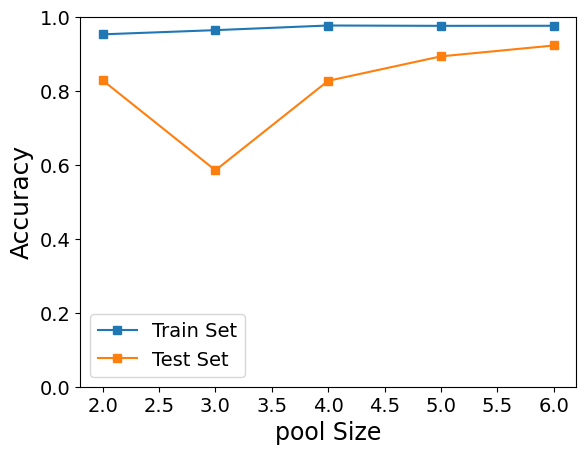

In [52]:
import matplotlib.pyplot as plt 
plt.figure()
plt.plot( range( 2, 7 ),list_train_accuracy, marker = 's' )
plt.plot( range( 2, 7),list_val_accuracy, marker = 's' )
plt.xlabel( 'pool Size', fontsize = 17 )
plt.ylabel( 'Accuracy', fontsize = 18 )
plt.legend(['Train Set', 'Test Set'], loc='best',fontsize = 14)
plt.ylim(0,1)
plt.xticks( fontsize = 14 )
plt.yticks( fontsize = 14 )
plt.show()

In [53]:
# raw_angle_files_1 = glob(os.path.join("D:\Research_Project\My_project_22\input\preprocessed_modified", "*", "*.csv"))
# # print(raw_angle_files_1)
# all_filenames = [i for i in raw_angle_files_1]
# df = pd.concat(map(pd.read_csv, all_filenames),ignore_index=True)
# data=pd.read_csv(r"D:\Research_Project\My_project_22\input\final_preprocessed_merged\tree_classifier_extracted.csv")
# print(df.shape)
# df = df.sample(frac = 1)
# # df.iloc[1:10,:]


list_train_accuracy=[]
list_val_accuracy=[]
for filter_size in range(2,11):
    data=pd.read_csv(r"D:\Research_Project\My_project_22\input\final_preprocessed_merged\corr_eigen_snr_large.csv")
    data=pd.get_dummies(data,columns=['target'])
    data=data.to_numpy()
    x,y=split_sequences(data,20)
    # x=x[None:]
    # print(x.shape)
    # print(y.shape)
    # data=data.to_numpy()
    print(data.shape)

    # y=data.iloc[:,26:]
    # x=data.iloc[:,:26]
    # # x=data[-1:26]
    # print(x.shape)
    # print(y.shape)
    # x=x.to_numpy()
    # y=y.to_numpy()
    x_train,x_test,y_train,y_test= train_test_split(x, y, test_size = 0.2)
    print(x_train.shape)
    print(y_train.shape)
    print(type(y_train))
    print(" kernel size : ",filter_size)
    model = Sequential()
    model.add(layers.Conv1D(filters=64, kernel_size=filter_size, activation='relu', input_shape=(20,60)))
    model.add(layers.Conv1D(filters=64, kernel_size=filter_size, activation='relu'))
    model.add(Dropout(0.5))
    model.add(layers.MaxPooling1D(pool_size=2))
    model.add(layers.Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(Dense(10, activation='softmax'))

    model.summary()


    # model.summary()
    # # log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    # # tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
    # print(y_train)
    # print(y_train.shape)

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # # print(x.shape)
    history = model.fit(x_train, y_train,batch_size=config.BATCH_SIZE,epochs=100,validation_data=(x_test,y_test),verbose=1)
    results = model.evaluate(x_test, y_test)
    y_pred=model.predict(x_test)
    y_pred=np.argmax(y_pred,axis=1)
    y_test=np.argmax(y_test,axis=1)
    list_train_accuracy.append(history.history["accuracy"][-1])
    list_val_accuracy.append(history.history["val_accuracy"][-1])
    print(y_pred)
    cf_matrix=confusion_matrix(y_test,y_pred)
    print('Confusion matrix\n',cf_matrix)
    print(classification_report(y_test,y_pred))

(12260, 70)
(9792, 20, 60)
(9792, 10)
<class 'numpy.ndarray'>
 kernel size :  2
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_27 (Conv1D)          (None, 19, 64)            7744      
                                                                 
 conv1d_28 (Conv1D)          (None, 18, 64)            8256      
                                                                 
 dropout_12 (Dropout)        (None, 18, 64)            0         
                                                                 
 max_pooling1d_12 (MaxPoolin  (None, 9, 64)            0         
 g1D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 576)               0         
                                                                 
 dense_22 (Dense)            (None, 100

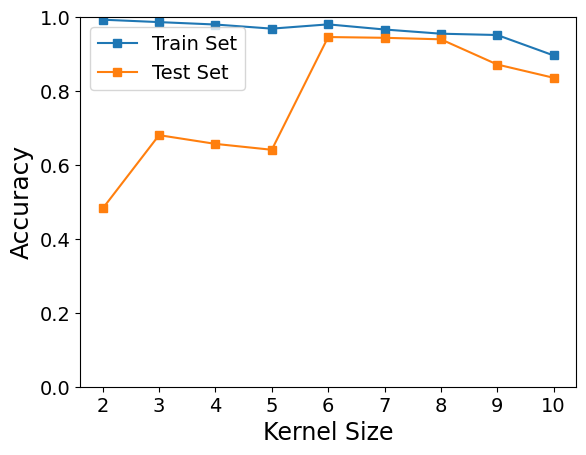

In [54]:
import matplotlib.pyplot as plt 
plt.figure()
plt.plot( range( 2, 11 ),list_train_accuracy, marker = 's' )
plt.plot( range( 2, 11),list_val_accuracy, marker = 's' )
plt.xlabel( 'Kernel Size', fontsize = 17 )
plt.ylabel( 'Accuracy', fontsize = 18 )
plt.legend(['Train Set', 'Test Set'], loc='best',fontsize = 14)
plt.ylim(0,1)
plt.xticks( fontsize = 14 )
plt.yticks( fontsize = 14 )
plt.show()


In [55]:
adam_optimisers=[]
list_learning_rate=[]
opt = keras.optimizers.Adam(learning_rate=0.01)
adam_optimisers.append(opt)
list_learning_rate.append(0.01)
opt = keras.optimizers.Adam(learning_rate=0.02)
adam_optimisers.append(opt)
list_learning_rate.append(0.02)
opt = keras.optimizers.Adam(learning_rate=0.03)
adam_optimisers.append(opt)
list_learning_rate.append(0.03)
opt = keras.optimizers.Adam(learning_rate=0.04)
adam_optimisers.append(opt)
list_learning_rate.append(0.04)
opt = keras.optimizers.Adam(learning_rate=0.05)
adam_optimisers.append(opt)
list_learning_rate.append(0.05)
opt = keras.optimizers.Adam(learning_rate=0.06)
adam_optimisers.append(opt)
list_learning_rate.append(0.06)
opt = keras.optimizers.Adam(learning_rate=0.07)
adam_optimisers.append(opt)
list_learning_rate.append(0.07)
opt = keras.optimizers.Adam(learning_rate=0.08)
adam_optimisers.append(opt)
list_learning_rate.append(0.08)
opt = keras.optimizers.Adam(learning_rate=0.09)
adam_optimisers.append(opt)
list_learning_rate.append(0.09)
opt = keras.optimizers.Adam(learning_rate=0.10)
adam_optimisers.append(opt)
list_learning_rate.append(0.10)
opt = keras.optimizers.Adam(learning_rate=0.11)
adam_optimisers.append(opt)
list_learning_rate.append(0.11)
opt = keras.optimizers.Adam(learning_rate=0.12)
adam_optimisers.append(opt)
list_learning_rate.append(0.12)
opt = keras.optimizers.Adam(learning_rate=0.13)
adam_optimisers.append(opt)
list_learning_rate.append(0.13)




In [56]:

# raw_angle_files_1 = glob(os.path.join("D:\Research_Project\My_project_22\input\preprocessed_modified", "*", "*.csv"))
# # print(raw_angle_files_1)
# all_filenames = [i for i in raw_angle_files_1]
# df = pd.concat(map(pd.read_csv, all_filenames),ignore_index=True)
# data=pd.read_csv(r"D:\Research_Project\My_project_22\input\final_preprocessed_merged\tree_classifier_extracted.csv")
# print(df.shape)
# df = df.sample(frac = 1)
# # df.iloc[1:10,:]


list_train_accuracy=[]
list_val_accuracy=[]
for opt in adam_optimisers:
    data=pd.read_csv(r"D:\Research_Project\My_project_22\input\final_preprocessed_merged\corr_eigen_snr_large.csv")
    data=pd.get_dummies(data,columns=['target'])
    data=data.to_numpy()
    x,y=split_sequences(data,20)
    # x=x[None:]
    # print(x.shape)
    # print(y.shape)
    # data=data.to_numpy()
    print(data.shape)

    # y=data.iloc[:,26:]
    # x=data.iloc[:,:26]
    # # x=data[-1:26]
    # print(x.shape)
    # print(y.shape)
    # x=x.to_numpy()
    # y=y.to_numpy()
    x_train,x_test,y_train,y_test= train_test_split(x, y, test_size = 0.2)
    print(x_train.shape)
    print(y_train.shape)
    print(type(y_train))
    
    model = Sequential()
    model.add(layers.Conv1D(filters=64, kernel_size=7, activation='relu', input_shape=(20,60)))
    model.add(layers.Conv1D(filters=64, kernel_size=7, activation='relu'))
    model.add(Dropout(0.5))
    model.add(layers.MaxPooling1D(pool_size=6))
    model.add(layers.Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(Dense(10, activation='softmax'))

    model.summary()


    # model.summary()
    # # log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    # # tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
    # print(y_train)
    # print(y_train.shape)

    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    # # print(x.shape)
    history = model.fit(x_train, y_train,batch_size=config.BATCH_SIZE,epochs=100,validation_data=(x_test,y_test),verbose=1)
    results = model.evaluate(x_test, y_test)
    y_pred=model.predict(x_test)
    y_pred=np.argmax(y_pred,axis=1)
    y_test=np.argmax(y_test,axis=1)
    list_train_accuracy.append(history.history["accuracy"][-1])
    list_val_accuracy.append(history.history["val_accuracy"][-1])
    print(y_pred)
    cf_matrix=confusion_matrix(y_test,y_pred)
    print('Confusion matrix\n',cf_matrix)
    print(classification_report(y_test,y_pred))

(12260, 70)
(9792, 20, 60)
(9792, 10)
<class 'numpy.ndarray'>
Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_45 (Conv1D)          (None, 14, 64)            26944     
                                                                 
 conv1d_46 (Conv1D)          (None, 8, 64)             28736     
                                                                 
 dropout_21 (Dropout)        (None, 8, 64)             0         
                                                                 
 max_pooling1d_21 (MaxPoolin  (None, 1, 64)            0         
 g1D)                                                            
                                                                 
 flatten_20 (Flatten)        (None, 64)                0         
                                                                 
 dense_40 (Dense)            (None, 100)               65

c:\Users\acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

(12260, 70)
(9792, 20, 60)
(9792, 10)
<class 'numpy.ndarray'>
Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_47 (Conv1D)          (None, 14, 64)            26944     
                                                                 
 conv1d_48 (Conv1D)          (None, 8, 64)             28736     
                                                                 
 dropout_22 (Dropout)        (None, 8, 64)             0         
                                                                 
 max_pooling1d_22 (MaxPoolin  (None, 1, 64)            0         
 g1D)                                                            
                                                                 
 flatten_21 (Flatten)        (None, 64)                0         
                                                                 
 dense_42 (Dense)            (None, 100)               65

c:\Users\acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

(12260, 70)
(9792, 20, 60)
(9792, 10)
<class 'numpy.ndarray'>
Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_67 (Conv1D)          (None, 14, 64)            26944     
                                                                 
 conv1d_68 (Conv1D)          (None, 8, 64)             28736     
                                                                 
 dropout_32 (Dropout)        (None, 8, 64)             0         
                                                                 
 max_pooling1d_32 (MaxPoolin  (None, 1, 64)            0         
 g1D)                                                            
                                                                 
 flatten_31 (Flatten)        (None, 64)                0         
                                                                 
 dense_62 (Dense)            (None, 100)               65

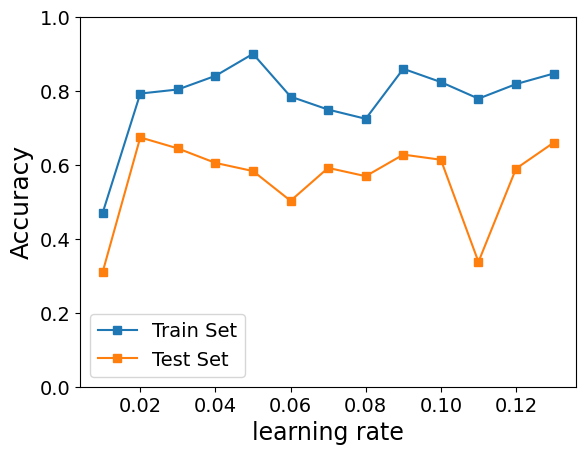

In [57]:
import matplotlib.pyplot as plt 
plt.figure()
plt.plot( list_learning_rate,list_train_accuracy, marker = 's' )
plt.plot( list_learning_rate ,list_val_accuracy, marker = 's' )
plt.xlabel( 'learning rate', fontsize = 17 )
plt.ylabel( 'Accuracy', fontsize = 18 )
plt.legend(['Train Set', 'Test Set'], loc='best',fontsize = 14)
plt.ylim(0,1)
plt.xticks( fontsize = 14 )
plt.yticks( fontsize = 14 )
plt.show()